In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC, SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import scipy.stats as sps
from itertools import product


Пыталась найти интересный, но ничего сильно интересного и подходящего не нашлось:( <br>
Ну ладно, будет популярный датасет про вино.

In [2]:

columns = ['Type', 'Alcohol', 'Malic_acid', 'Ash', 'Alcalinity_of_ash ',
           'Magnesium', 'Total_phenols', 'Flavanoids' , 'Nonflavanoid_phenols',
           'Proanthocyanins', 'Color_intensity', 'Hue', 'OD280_OD315', 'Proline']
data = pd.read_csv('wine.data', header = None, names=columns)

data.head()

,Type,Alcohol,Malic_acid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280_OD315,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


Разделяем на трейн, тест и валидацию

In [3]:
train, test = train_test_split(data, test_size=0.2)
test, valid = train_test_split(test, test_size=0.5)

X_train, y_train = np.array(train.iloc[:, 1:]), np.array(train.iloc[:, 0])
X_test, y_test = np.array(test.iloc[:, 1:]), np.array(test.iloc[:, 0])
X_val, y_val = np.array(valid.iloc[:, 1:]), np.array(valid.iloc[:, 0])

Напишем функцию для зашумления меток. Зашумить метки можно по-разному. В моем датасете есть 3 разных метки : 1, 2, 3. Конечно, можно было бы взять нужную по размеру часть меток случайно и присвоить им рандомный label. Но тогда кол-во шума в полученной модели может быть меньше, чем хотелось (так как при рандомном присваивании мы можем присвоить истинный label). Поэтому будем выбирать рандомно из неправильных лэйблов.

In [4]:
def add_some_noise(true_labels, p):
    n = len(true_labels)
    noisy_indeces = np.random.choice(np.arange(n), int(p * n), replace=False)
    random_addition = sps.bernoulli(p=0.5).rvs(size=int(p * n)) + 1
    noisy_labels = true_labels.copy() - 1
    noisy_labels[noisy_indeces] = (noisy_labels[noisy_indeces] + random_addition) % 3
    return noisy_labels + 1

Подбираем параметры на валидации. Кроме параметров подберем еще классификатор - один из трех : LinearSVC, SVC, LogisticRegression.

In [5]:
names_clfs = ['LinearSVC', 'SVC', 'LogisticRegression']
clfs = [LinearSVC, SVC, LogisticRegression]
param_grid_svc = {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf', 'poly']}
param_grid_logistic = {"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}
param_grid_linear_svc = {'C': [1, 10, 100, 1000]}

params = [param_grid_linear_svc, param_grid_svc, param_grid_logistic]

best_acc = 0
for i, classificator in enumerate(clfs):
    range_params = params[i]
    all_params = list(product(*list(range_params.values())))
    name_params = range_params.keys()
    for param_set in all_params:
        clf = classificator(**dict(zip(name_params, param_set)))
        clf.fit(X_train, y_train)
        pred_val = clf.predict(X_val)
        acc = accuracy_score(y_val, pred_val)
        print('{}, params : {}, accuracy = {}'.format(names_clfs[i], param_set, acc))
        if acc > best_acc:
            best_name_clf = names_clfs[i]
            best_params = param_set
            best_acc = acc

LinearSVC, params : (1,), accuracy = 1.0
LinearSVC, params : (10,), accuracy = 0.6666666666666666
LinearSVC, params : (100,), accuracy = 0.6666666666666666
LinearSVC, params : (1000,), accuracy = 0.6111111111111112
SVC, params : (1, 0.001, 'rbf'), accuracy = 0.6111111111111112
SVC, params : (1, 0.001, 'poly'), accuracy = 0.8888888888888888
SVC, params : (1, 0.0001, 'rbf'), accuracy = 0.7777777777777778
SVC, params : (1, 0.0001, 'poly'), accuracy = 0.9444444444444444
SVC, params : (10, 0.001, 'rbf'), accuracy = 0.7222222222222222
SVC, params : (10, 0.001, 'poly'), accuracy = 0.8888888888888888
SVC, params : (10, 0.0001, 'rbf'), accuracy = 0.7222222222222222
SVC, params : (10, 0.0001, 'poly'), accuracy = 0.8888888888888888
SVC, params : (100, 0.001, 'rbf'), accuracy = 0.7222222222222222
SVC, params : (100, 0.001, 'poly'), accuracy = 0.8888888888888888
SVC, params : (100, 0.0001, 'rbf'), accuracy = 0.7222222222222222
SVC, params : (100, 0.0001, 'poly'), accuracy = 0.8888888888888888
SVC, 

У нас явно есть победитель. Их даже 2. Возьмем лучше логистическую регрессию, так как SVM работает с элементом случайности и в следующий раз результат может получиться хуже. <br>
Отсюда, конечно, так же видно, что датасет очень простой : 100 % accuracy на валидации! Ну , какой есть... <br>
Теперь собственно посмотрим на зависимость accuracy от кол-ва шума

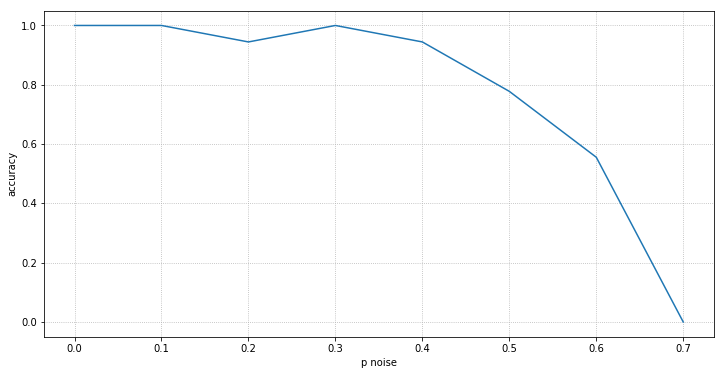

In [16]:
p_noise = np.arange(0.0, 0.8, 0.1)
accs_1 = []
for p in p_noise:
    noisy_y_train = add_some_noise(y_train, p)
    clf = LogisticRegression(C=10, penalty='l1')
    clf.fit(X_train, noisy_y_train)
    preds = clf.predict(X_test)
    accs_1.append(accuracy_score(y_test, preds))
    
    
plt.figure(figsize=(12, 6))
plt.plot(p_noise, accs_1)
plt.xlabel('p noise')
plt.ylabel('accuracy')
plt.grid(ls=':')
plt.show()

## 2

Majority vote заглючается в том, что мы для каждого объекта подсчитываем оценку вероятности (по данным) быть в определенном классе для каждого класса. Так как в данном случае мы модели подаем метки, а не вероятности, то нам по сути нужна самая популярная метка среди всех для данного объекта. И понятно, что чем больше меток для каждого объекта, тем лучше : таким образом мы сможем фильтровать метки.

В качестве классификатора я взяла тот же, что показал лучшие результаты в прошлом пункте.

In [42]:
count = [2, 4, 6, 8, 10]
acc_scores = []
for c in count:
    new_y_train = np.tile(y_train, c)
    accs = []
    for p in p_noise:
        noisy_y_train = add_some_noise(new_y_train, p).reshape(c, len(y_train))
        z = []
        for i in [1, 2, 3]:
            z_i = np.sum(noisy_y_train == i, axis=0) / c
            z.append(z_i)
        majority_vote = np.array(z).argmax(axis=0) + 1
        clf = LogisticRegression(C=10, penalty='l1')
        clf.fit(X_train, majority_vote)
        preds = clf.predict(X_test)
        accs.append(accuracy_score(preds, y_test))
    acc_scores.append(accs)
    

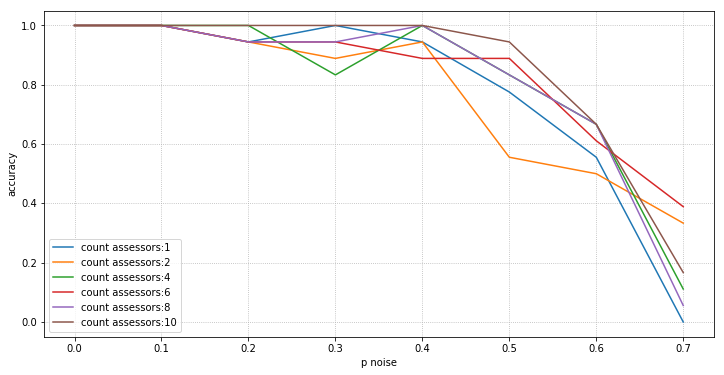

In [46]:
plt.figure(figsize=(12, 6))
plt.plot(p_noise, accs_1, label='count assessors:1')
for i, accs in enumerate(acc_scores):  
    plt.plot(p_noise, accs, label='count assessors:{}'.format(count[i]))
    
plt.xlabel('p noise')
plt.ylabel('accuracy')
plt.legend()
plt.grid(ls=':')
plt.show()

Видим, что, чем больше перекрытие, тем больше получается accuracy, что логично. Однако в силу того, что датасет достаточно простой при $p \leq 0.4$ этого особо не видно. Однако при уже более больших p результат сильно заметен. Например, при кол-ве шума 70% (что, конечно, вроде не очень реалистично) в случае наличия только одной метки для каждого объекта мы получаем accuracy=0, а вот если возьмем 10 асессоров на каждый объект, то получим accuracy = 0.4, что огромная разница.

Вывод: чем больше ассесоров, тем лучше

## 3

Возьмем кол-во асессоров, равное 4. Можно, конечно, провести эксперименты с разным перекрытием, но, кажется, что это не нужно. <br>
Для Dawid & Skene алгоритма нужно по сути только написать итерации EM-алгоритма, которые в данном случае выражаются достаточно просто.

Будем тестировать алгоритм при разном кол-ве шума.

Сначала инизиализация матриц, которые будут приближаться в итрерациях EM-а.

In [249]:
count_classes = 3
count_assessors = 4
count_iters = 100

# initialization
p_c = np.array([0.29, 0.31, 0.4])
e_w = sps.uniform.rvs(size=(count_assessors, count_classes, count_classes))
e_w /= np.sum(e_w, axis=-1).reshape(count_assessors, count_classes, 1)

z_j_c = np.zeros((len(y_train), count_classes))
new_y_train = np.tile(y_train, count_assessors)

Теперь собственно алгоритм. Для каждого кол-ва шума будем сохранять accuracy как и ранее. Кол-во итераций возьмем равным 200.

In [255]:
accs = []
count_iters = 200
for p in [0.1, 0.2, 0.3, 0.4, 0.5]:
    new_noise_y_train = add_some_noise(new_y_train, p).reshape(count_assessors, len(y_train)).T - 1

    for i in range(count_iters):
        # E step
        for obj in range(len(y_train)):
            for c in range(count_classes):
                z_j_c[obj, c] = p_c[c] * np.prod(e_w[np.arange(count_assessors), 
                                            np.tile([c], count_assessors), new_noise_y_train[obj]])
            

        z_j_c /= np.sum(z_j_c, axis=-1).reshape(len(y_train), 1)

        # M step
        for w in range(count_assessors):
            for c in range(count_classes):
                tile_z_c = np.tile(z_j_c[:,c], (count_classes, 1))
                indicators = []
                for k in range(count_classes):
                    indicators.append(new_noise_y_train[:, w] == k)
                e_w[w, c] = np.sum(tile_z_c * np.array(indicators), axis=-1)
                
        e_w /= np.sum(e_w, axis=-1).reshape(count_assessors, -1, 1)
        p_c = np.sum(z_j_c, axis=0) / len(y_train)
            
    aggregate_y_train = np.argmax(z_j_c, axis=-1) + 1
    
    print((aggregate_y_train == y_train).sum())
    print(aggregate_y_train[:15])
    print(y_train[:15])
    clf = LogisticRegression(C=10, penalty='l1')
    clf.fit(X_train, aggregate_y_train)
    preds = clf.predict(X_test)
    accs.append(accuracy_score(preds, y_test))

137
[1 3 1 1 1 3 3 1 2 3 2 1 3 1 2]
[1 3 1 1 1 3 3 1 2 3 2 1 3 1 2]
124
[1 3 1 1 1 3 3 1 2 3 1 1 3 1 2]
[1 3 1 1 1 3 3 1 2 3 2 1 3 1 2]
113
[1 2 1 1 1 1 3 1 2 3 2 1 3 1 1]
[1 3 1 1 1 3 3 1 2 3 2 1 3 1 2]
85
[1 1 1 2 1 1 1 1 1 3 2 1 1 1 1]
[1 3 1 1 1 3 3 1 2 3 2 1 3 1 2]
76
[2 1 1 2 1 3 1 1 2 1 2 3 1 1 3]
[1 3 1 1 1 3 3 1 2 3 2 1 3 1 2]


Тут выведено кол-во совпадающий значений настоящих меток и агрегированных после алгоритма Dawid & Skene и первые 15 получившихся агрегированных меток и истинных для разного p. Общее кол-во меток в трейне - 142, поэтому можно сказать, что при небольших p агрегированные метки получаются довольно хорошими. Также можно увидеть, что кол-во совпадений уменьшается с ростом кол-ва шума, что не удивительно. 

Теперь сравним с Majority vote при том же перекрытии, то есть при 4 метках для каждого объекта.

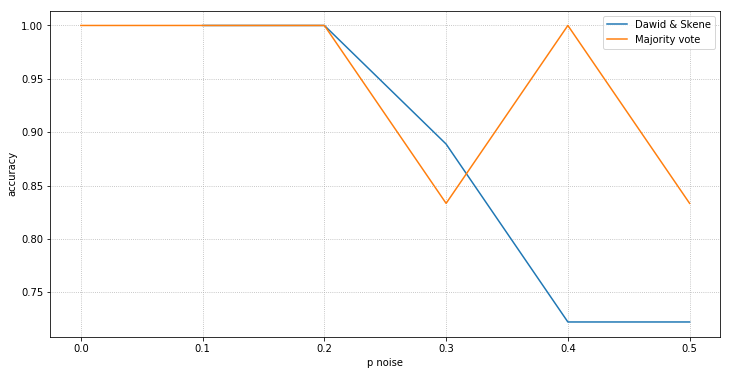

In [58]:
plt.figure(figsize=(12, 6))

plt.plot([0.1, 0.2, 0.3, 0.4, 0.5], accs, label='Dawid & Skene')

plt.plot(p_noise[:-2], acc_scores[1][:-2], label='Majority vote')
    
plt.xlabel('p noise')
plt.ylabel('accuracy')
plt.legend()
plt.title('Experiments for count assessors = 4')
plt.grid(ls=':')
plt.show()

Видим, что если сравнивать с качеством при таком же перекрытии при использовании Majority Vote, то можно заметить, что получилось в среднем заметно лучше. Только при p = 0.3 получилось чуть хуже:(